In [2]:
# !pip install --upgrade --user uproot4 awkward1 particle boost-histogram matplotlib mplhep pandas numexpr autograd hist hist[plot] humanize

In [3]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg


from pprint import pprint


In [4]:
file=uproot4.open("g4e_k_lambda_18on275_10k_l2.run.root")

In [5]:
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

# Uncomment this to see all values:
tree.show()

Number of entries: 1000
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event_id             | uint64_t                 | AsDtype('>u8')
evt_true_q2          | double                   | AsDtype('>f8')
evt_true_x           | double                   | AsDtype('>f8')
evt_true_y           | double                   | AsDtype('>f8')
evt_true_w2          | double                   | AsDtype('>f8')
evt_true_nu          | double                   | AsDtype('>f8')
evt_true_t_hat       | double                   | AsDtype('>f8')
evt_has_dis_info     | int8_t                   | AsDtype('int8')
evt_weight           | double                   | AsDtype('>f8')
hit_count            | uint64_t                 | AsDtype('>u8')
hit_id               | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_trk_id           | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
h

In [22]:
trk_mom = tree['trk_mom'].array(library='ak')
trk_pdg = tree['trk_pdg'].array(library='ak')
trk_vtx_dir_x = tree['trk_vtx_dir_x'].array(library='ak')
trk_vtx_dir_y = tree['trk_vtx_dir_y'].array(library='ak')
trk_vtx_dir_z = tree['trk_vtx_dir_z'].array(library='ak')

In [23]:
filter_proton = trk_pdg==2212
filter_pi = trk_pdg==-211

single_prot_mom = trk_mom[filter_proton]
single_pion_mom = trk_mom[filter_pi]

single_prot_mom_x = single_prot_mom*trk_vtx_dir_x[filter_proton]
single_prot_mom_y = single_prot_mom*trk_vtx_dir_y[filter_proton]
single_prot_mom_z = single_prot_mom*trk_vtx_dir_z[filter_proton]

single_pion_mom_x = single_pion_mom*trk_vtx_dir_x[filter_pi]
single_pion_mom_y = single_pion_mom*trk_vtx_dir_y[filter_pi]
single_pion_mom_z = single_pion_mom*trk_vtx_dir_z[filter_pi]

# Converting to pairs and then to arrays aligned by pairs
combo_ppi_mom = ak.cartesian([single_prot_mom, single_pion_mom])
pair_prot_mom = ak.flatten(ak.unzip(combo_ppi_mom)[0])
pair_pion_mom = ak.flatten(ak.unzip(combo_ppi_mom)[1])

combo_ppi_mom_x = ak.cartesian([single_prot_mom_x, single_pion_mom_x])
pair_prot_mom_x = ak.flatten(ak.unzip(combo_ppi_mom_x)[0])
pair_pion_mom_x = ak.flatten(ak.unzip(combo_ppi_mom_x)[1])

combo_ppi_mom_y = ak.cartesian([single_prot_mom_y, single_pion_mom_y])
pair_prot_mom_y = ak.flatten(ak.unzip(combo_ppi_mom_y)[0])
pair_pion_mom_y = ak.flatten(ak.unzip(combo_ppi_mom_y)[1])

combo_ppi_mom_z = ak.cartesian([single_prot_mom_z, single_pion_mom_z])
pair_prot_mom_z = ak.flatten(ak.unzip(combo_ppi_mom_z)[0])
pair_pion_mom_z = ak.flatten(ak.unzip(combo_ppi_mom_z)[1])

print(len(pair_prot_mom), len(pair_pion_mom), len(pair_prot_mom_x), len(pair_pion_mom_x), len(pair_pion_mom_y), len(pair_prot_mom_z), len(pair_pion_mom_z), len(pair_prot_mom_y))

328 328 328 328 328 328 328 328


In [25]:
prot_mass=0.93827
pion_mass=0.1349

prot_energy = np.sqrt( pair_prot_mom**2 + prot_mass**2 )
pion_energy = np.sqrt( pair_pion_mom**2 + pion_mass**2 )

prot_energy
pion_energy

<Array [24.6, 22.5, 40.3, ... 51.5, 25.9, 37.7] type='328 * float64'>

In [26]:
lambda_mass = np.sqrt( (prot_energy + pion_energy)**2 - (pair_prot_mom_x + pair_pion_mom_x)**2  - (pair_prot_mom_y + pair_pion_mom_y)**2 - (pair_prot_mom_z + pair_pion_mom_z)**2 )
lambda_mass


[StepArtists(step=<matplotlib.lines.Line2D object at 0x0000024C73D55188>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

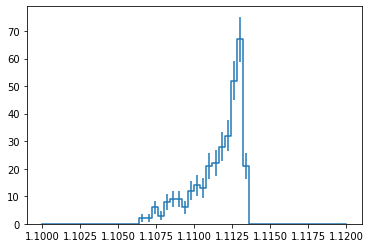

In [27]:
h = Hist(
    hist.axis.Regular(
        50, 1.1, 1.12, name="lambda_mass", label="Mass of #Lambda [GeV/c2]", underflow=False, overflow=False
    ),
)



h.fill(lambda_mass)
h.plot()

In [ ]:
MassLambda



In [ ]:
print(Proton_Mom)

In [ ]:
(E_proton + E_pion)**2

In [ ]:
(Proton_momentum_x + Pion_momentum_x)**2

In [ ]:
Proton_momentum_x + Pion_momentum_x

In [ ]:
Proton_momentum_x

In [ ]:
Pion_momentum_x

In [ ]:
([10.3],[-0.866])+([10.6],[-1.44])

In [ ]:
[10.3]